In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 670.4 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 882.6 kB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 931.8 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 994.4 kB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=8d0412ea9f762322a5de306894bb89d4e583589f520ed311cf1215d1f47b3ca9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\cc\bd

In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 882.6 kB/s eta 0:06:16
   ---------------------------------------- 0.8/331.9 MB 838.9 kB/s eta 0:06:35
   ---------------------------------------- 0.8/331.9 MB 838.9 kB/s eta 0:06:35
   ---------------------------------------- 1.3/331.9 MB 958.5 kB/s eta 0:05:45
   ---------------------------------------- 1.6/331.9 MB 1.0 MB/s eta 0:05:16
   ---------------------------------------- 1.8/331.9 MB 1.1 MB/s eta 0:04:56
   ---------------------------------------- 2.4/331.9 MB 1.3 MB/s eta 0:04:21
   ---------------------------------------- 2.6/331.9 MB 1.3 MB/s eta 0:04:18
   ---------------------------------------- 3.1/331.9 MB 1.4 MB/s eta 0:04:01
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.5 which is incompatible.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [13]:
stock = "AAPL"  # you can change (TCS.NS, INFY.NS etc)
df = yf.download(stock, start="2018-01-01", end="2024-12-31")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304176  40.313537  39.602258  39.812835  102223600
2018-01-03  40.297169  40.839988  40.233999  40.367361  118071600
2018-01-04  40.484348  40.587297  40.262075  40.369700   89738400
2018-01-05  40.945267  41.031836  40.489020  40.580269   94640000
2018-01-08  40.793175  41.087979  40.694903  40.793175   82271200


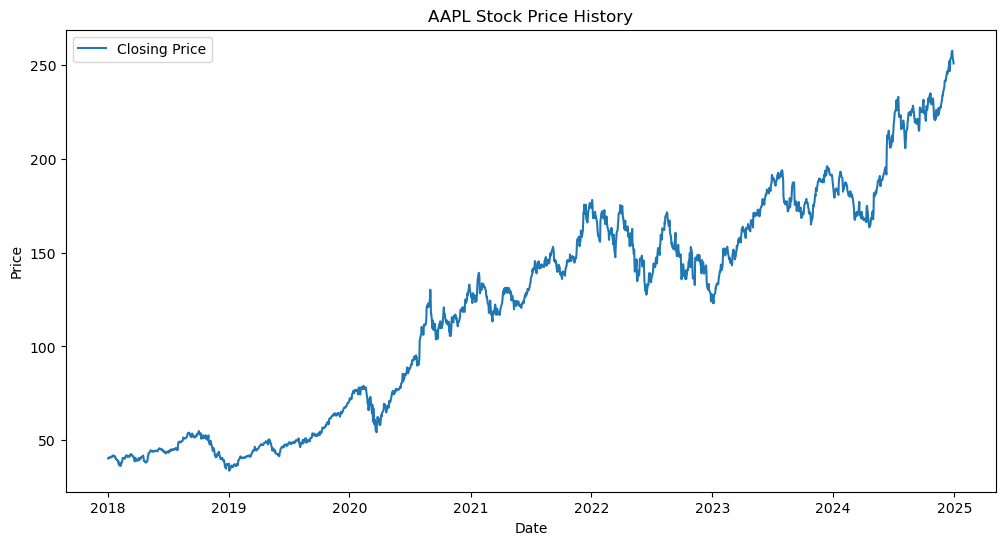

In [14]:
# Plot closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price")
plt.title(f"{stock} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig("stock_price_history.png")
plt.show()

In [15]:
data = df[['Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# create sequences
X = []
y = []

sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [16]:
# reshape for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [17]:
# train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.0101
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.6765e-04
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 4.9488e-04
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 4.7145e-04
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 4.6076e-04
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 4.4523e-04
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 4.1354e-04
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 3.7844e-04
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 3.6742e-04
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 3.6458e-04


In [19]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
actual = scaler.inverse_transform(y_test.reshape(-1,1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


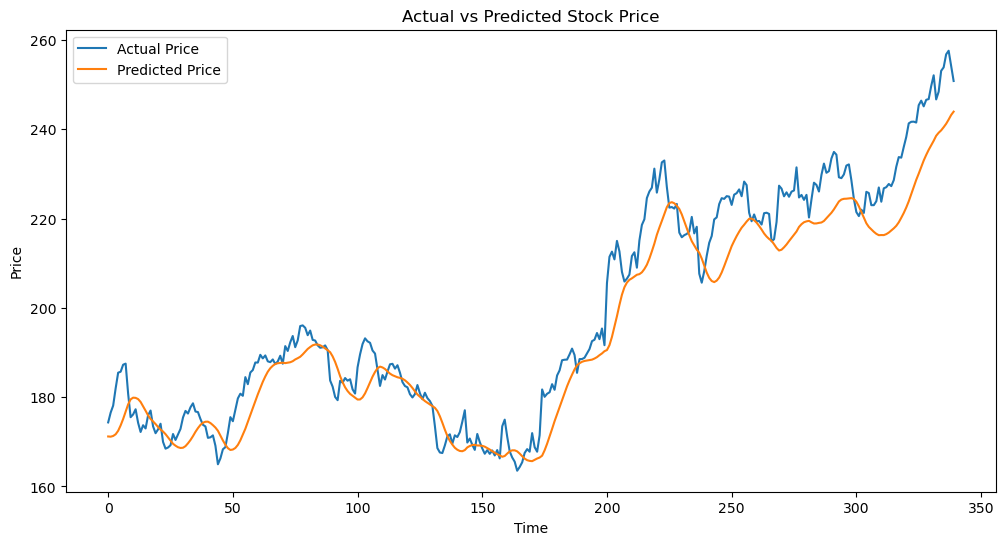

In [20]:
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.savefig("actual_vs_predicted.png")
plt.show()

In [21]:
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1,60,1))
future_price = model.predict(last_60_days)
future_price = scaler.inverse_transform(future_price)
print("Predicted Next Day Price:", future_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted Next Day Price: 244.27702


In [22]:
df1 = pd.read_csv("AAPL.csv")
# Convert date column
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date')
print(df.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304176  40.313537  39.602258  39.812835  102223600
2018-01-03  40.297169  40.839988  40.233999  40.367361  118071600
2018-01-04  40.484348  40.587297  40.262075  40.369700   89738400
2018-01-05  40.945267  41.031836  40.489020  40.580269   94640000
2018-01-08  40.793175  41.087979  40.694903  40.793175   82271200


In [23]:
# Create daily return
df1['Return'] = df1['Close'].pct_change()
# Moving averages
df1['MA5'] = df1['Close'].rolling(window=5).mean()
df1['MA10'] = df1['Close'].rolling(window=10).mean()
# Target variable
# 1 = Price Up, 0 = Price Down
df1['Target'] = np.where(df1['Close'].shift(-1) > df1['Close'], 1, 0)
df1.dropna(inplace=True)

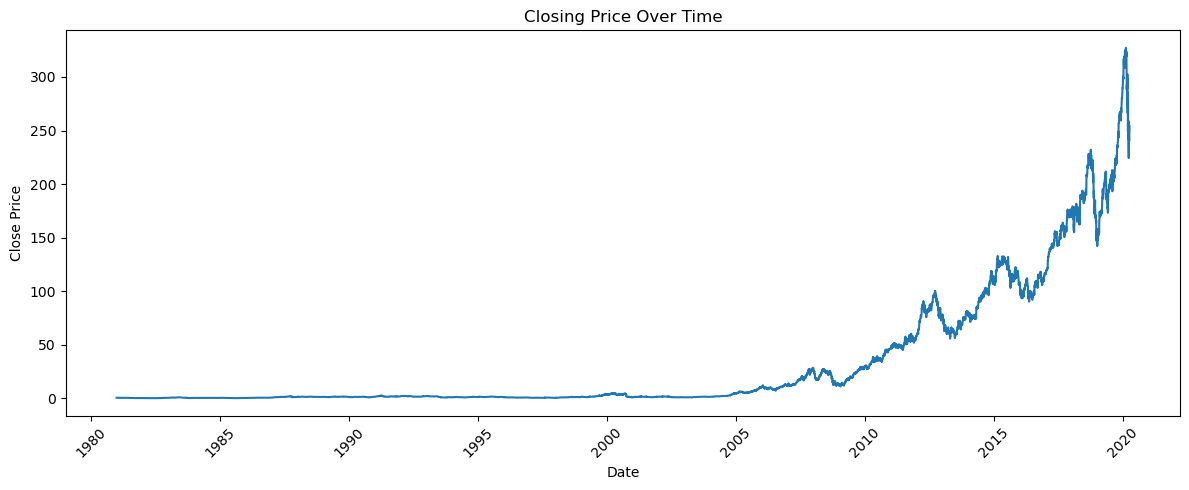

In [24]:
# Closing price over time
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("close_price_trend.png")
plt.show()

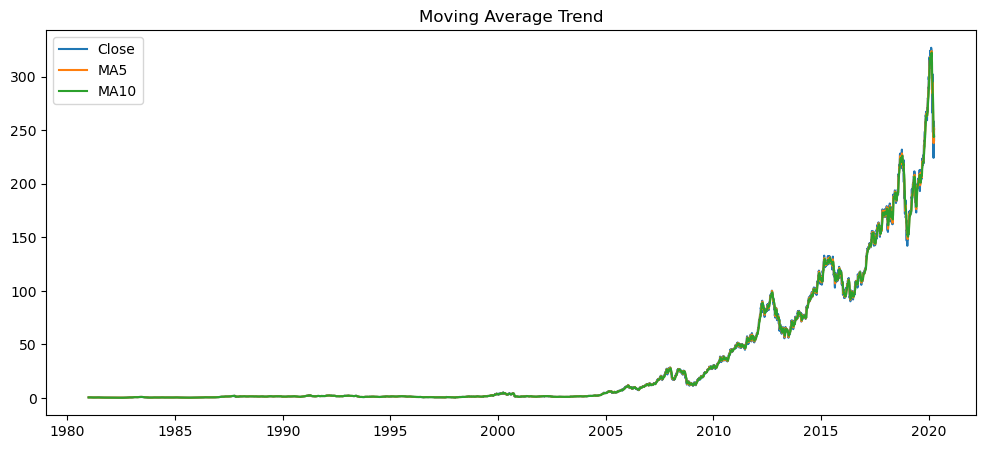

In [25]:
# Moving Averages
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Close'], label='Close')
plt.plot(df1['Date'], df1['MA5'], label='MA5')
plt.plot(df1['Date'], df1['MA10'], label='MA10')
plt.legend()
plt.title("Moving Average Trend")
plt.savefig("moving_average.png")
plt.show()

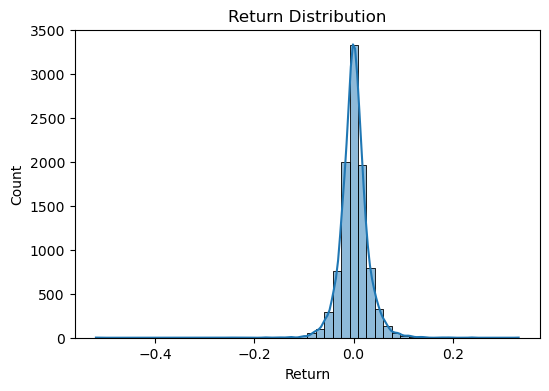

In [26]:
# Return Distribution
plt.figure(figsize=(6,4))
sns.histplot(df1['Return'], bins=50, kde=True)
plt.title("Return Distribution")
plt.savefig("return_distribution.png")
plt.show()

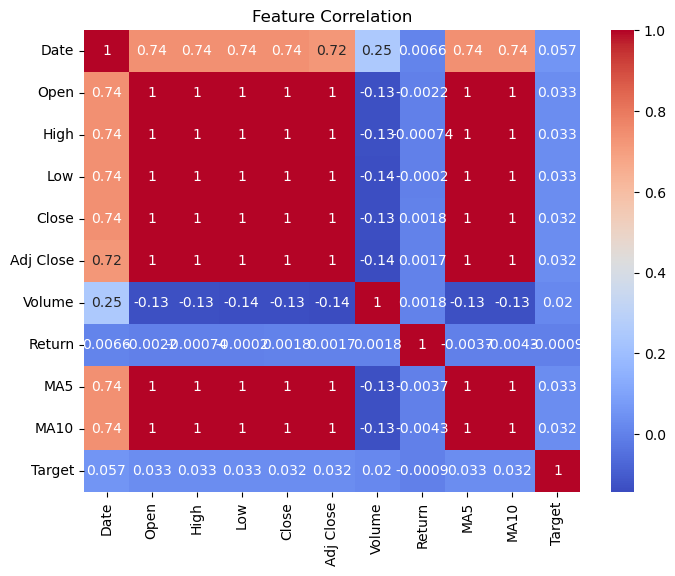

In [27]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.savefig("correlation_heatmap.png")
plt.show()

In [30]:
features = ['Open','High','Low','Close','Volume','MA5','MA10','Return']
X = df1[features]
y = df1['Target']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [31]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf')
}

results = {}


Decision Tree Accuracy: 52.121212121212125
              precision    recall  f1-score   support

           0       0.50      0.06      0.11       949
           1       0.52      0.94      0.67      1031

    accuracy                           0.52      1980
   macro avg       0.51      0.50      0.39      1980
weighted avg       0.51      0.52      0.40      1980



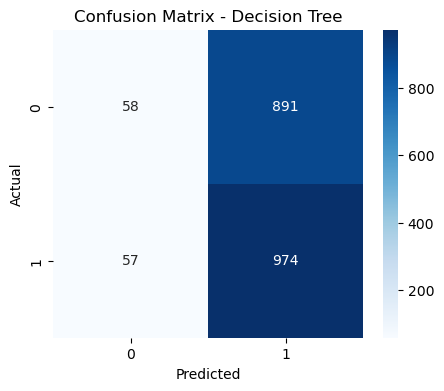


KNN Accuracy: 47.97979797979798
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       949
           1       0.50      0.15      0.23      1031

    accuracy                           0.48      1980
   macro avg       0.49      0.49      0.42      1980
weighted avg       0.49      0.48      0.41      1980



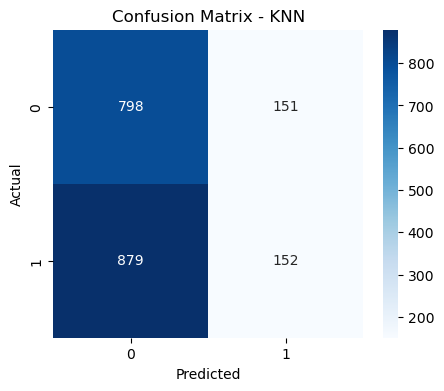


SVM Accuracy: 48.08080808080808
              precision    recall  f1-score   support

           0       0.48      0.82      0.60       949
           1       0.50      0.17      0.26      1031

    accuracy                           0.48      1980
   macro avg       0.49      0.49      0.43      1980
weighted avg       0.49      0.48      0.42      1980



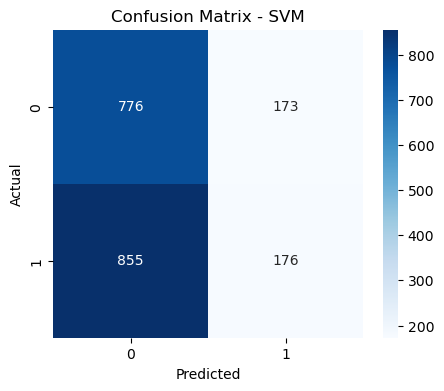

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = (accuracy_score(y_test, pred))*100
    results[name] = acc

    print(f"\n{name} Accuracy:", acc)
    print(classification_report(y_test, pred))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"cm_{name}.png")
    plt.show()

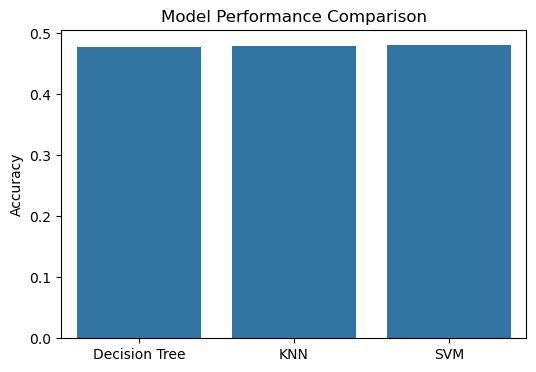

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.savefig("model_comparison.png")
plt.show()